{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:
* Derive a **CHM** in `Python` using raster math.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and a working version of python version 3.x.
Your instructors recommend the Python Anaconda distribution. 

[<i class="fa fa-download" aria-hidden="true"></i> Download spatial-vector-lidar data subset (~172 MB)](https://ndownloader.figshare.com/files/12459464){:data-proofer-ignore='' .btn }

IYou will need a computer with internet access to complete this lesson. If you are following along online and not using our cloud environment:

[<i class="fa fa-download" aria-hidden="true"></i> Get data and software setup instructionshere]({{site.url}}/workshops/gis-open-source-python/){:data-proofer-ignore='' .btn }

You will need anaconda 3.x, git and bash to set things up.

</div>

### Be sure to set your working directory
`os.chdir("path-to-you-dir-here/earth-analytics/data")`

In [1]:
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# a package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.spatial as es
# plot inline in the notebook
plt.ion()

from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

#import matplotlib.pyplot as plt
#from matplotlib.patches import Patch
#from mpl_toolkits.axes_grid1 import make_axes_locatable
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In the previous lesson you learned how to open and plot raster data. In this lesson you'll learn how to subtract one raster from another. In this example we have a lidar digital surface model and an elevation model. If you subtract elevation from the top of the earth's surface then you can get tree (and building) heights!

<figure>
   <a href="{{ site.url }}/images/courses/earth-analytics/lidar-raster-data-r/lidarTree-height.png">
   <img src="{{ site.url }}/images/courses/earth-analytics/lidar-raster-data-r/lidarTree-height.png" alt="Lidar derived DSM, DTM and CHM."></a>
   <figcaption>Digital Surface Model (DSM), Digital Elevation Models (DEM) and
   the Canopy Height Model (CHM) are the most common raster format lidar
   derived data products. One way to derive a CHM is to take
   the difference between the digital surface model (DSM, tops of trees, buildings
   and other objects) and the Digital Terrain Model (DTM, ground level). The CHM
   represents the actual height of trees, buildings, etc. with the influence of
   ground elevation removed. Graphic: Colin Williams, NEON
   </figcaption>
</figure>

To begin, be sure that you have the digital terrain model `data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif` open already. You used this layer in the previous lesson.

In [2]:
# open the digital terrain model 
sjer_dtm_path = "data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif"

with rio.open(sjer_dtm_path) as src:
    lidar_dem_im = src.read(1, masked=True)
    sjer_ext = rio.plot.plotting_extent(src)

### Import Digital Surface Model (DSM)

Next, open the digital surface model (DSM). The DSM represents the top of
the earth's surface. Thus, it INCLUDES TREES, BUILDINGS and other objects that
sit on the earth.

In [3]:
# open the digital terrain model 
sjer_dsm_path = "data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDSM.tif"

with rio.open(sjer_dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    dsm_meta = src.profile

In [4]:
lidar_dsm_im

masked_array(
  data=[[1360.4599609375, 1360.3499755859375, 1360.02001953125, ...,
         1020.699951171875, 1020.3599853515625, 1020.7599487304688],
        [1360.4599609375, 1360.27001953125, 1359.8099365234375, ...,
         1006.5399780273438, 1019.0700073242188, 1022.9099731445312],
        [1379.8199462890625, 1362.6500244140625, 1363.22998046875, ...,
         1014.1699829101562, 1016.2699584960938, 1015.2799682617188],
        ...,
        [1318.47998046875, 1321.0499267578125, 1323.72998046875, ...,
         1167.68994140625, 1171.27001953125, 1172.3099365234375],
        [1318.02001953125, 1319.1199951171875, 1322.6300048828125, ...,
         1172.7099609375, 1169.969970703125, 1167.739990234375],
        [1319.419921875, 1319.8399658203125, 1320.3199462890625, ...,
         1182.280029296875, 1179.0, 1171.27001953125]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False,


## Canopy Height Model

The canopy height model (CHM) represents the HEIGHT of the trees. This is not
an elevation value, rather it's the height or distance between the ground and the top of the
trees (or buildings or whatever object that the lidar system detected and recorded). Some canopy height models also include buildings so you need to look closely
are your data to make sure it was properly cleaned before assuming it represents
all trees!

### Calculate difference between two rasters

There are different ways to calculate a CHM. One easy way is to subtract the
DEM from the DSM.

**DSM - DEM = CHM**

This math gives you the residual value or difference between the top of the
earth surface and the ground which should be the heights of the trees (and buildings
if the data haven't been "cleaned").

<i fa fa-star></i>**Data Tip:** Note that this method of subtracting 2 rasters to create a CHM may not give you the most accurate results! There are better ways to create CHM's using the point clouds themselves. However, in this lesson you learn this method as a means to get more familiar with the CHM dataset and to understand how to perform raster calculations in `Python`. 
{: .notice--success}


In [5]:
# calculate canopy height model
lidar_chm = lidar_dsm_im - lidar_dem_im

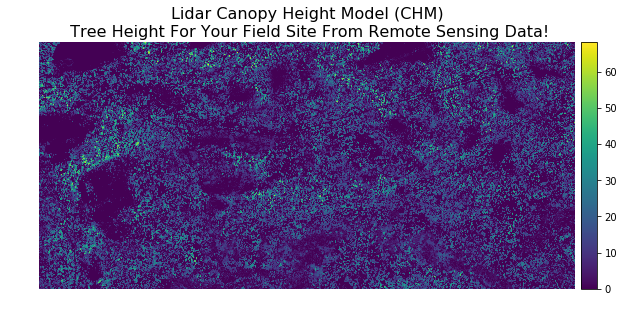

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
chm_plot = ax.imshow(lidar_chm, 
                     cmap='viridis')
ax.set_axis_off()

es.colorbar(chm_plot)
ax.set_title("Lidar Canopy Height Model (CHM)\n Tree Height For Your Field Site From Remote Sensing Data!", 
             fontsize = 16);

In [7]:
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['grid.color'] = 'grey'
# plt.rcParams['grid.linestyle'] = '-'
# plt.rcParams['grid.linewidth'] = '.5'
# plt.rcParams['lines.color'] = 'purple'

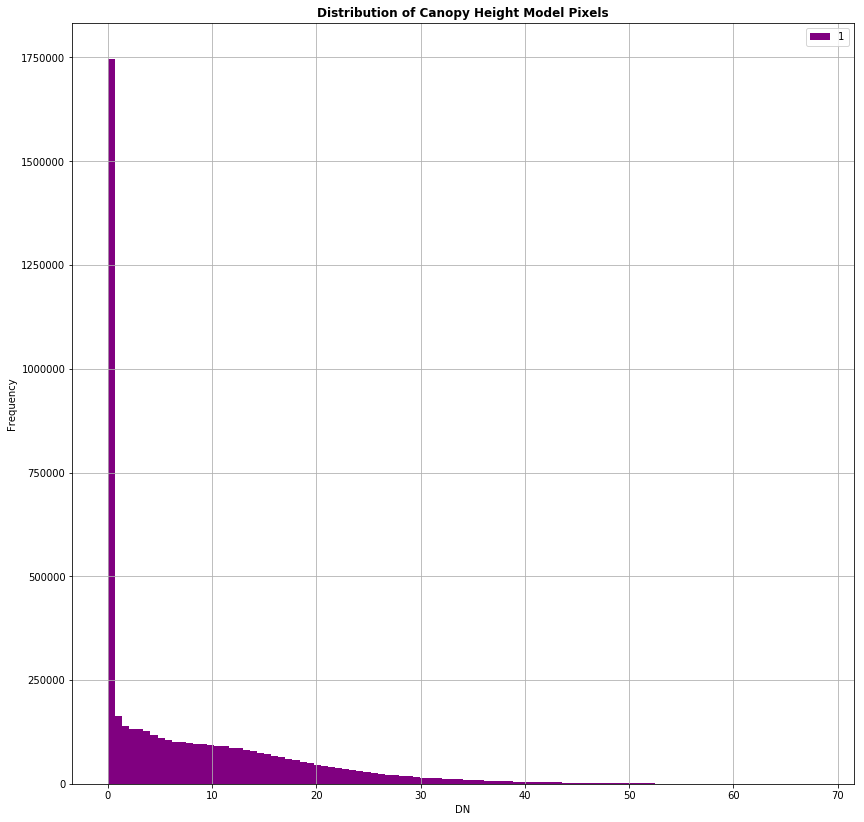

In [8]:
# view histogram of the data
fig, ax = plt.subplots(figsize = (14,14))
show_hist(lidar_chm, 
          facecolor = 'purple',
          bins=100,
          title = "Distribution of Canopy Height Model Pixels");

Take a close look at the output CHM. Do you think that the data just represents trees? Or do you see anything that may suggest that there are other types of objects represented in the data?


### Exploring your CHM

Let's explore your data a bit more to better understand the range of tree (and building) heights that you have in your CHM. 

In [9]:
print('CHM minimum value: ', lidar_chm.min())
print('CHM max value: ', lidar_chm.max())

CHM minimum value:  0.0
CHM max value:  68.119995



## Plots Using Breaks

Sometimes a gradient of colors is useful to represent a continuous variable.
But other times, it's useful to apply colors to particular ranges of values
in a raster. These ranges may be statistically generated or simply visually.

Create breaks in your CHM plot.

In [10]:
# Define the colors you want
cmap = ListedColormap(["white", "tan", "springgreen", "darkgreen"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 2, 10, 20, 30], 5)

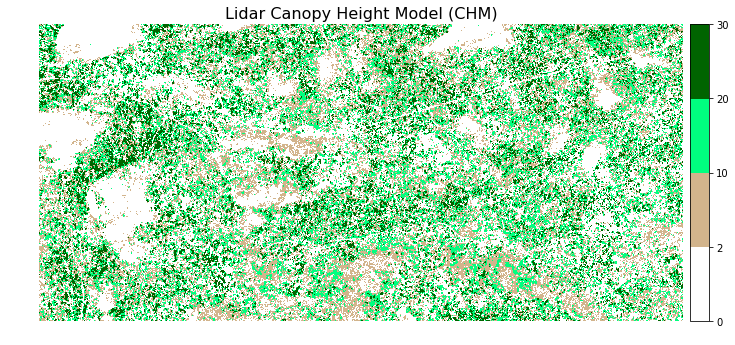

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
chm_plot = ax.imshow(lidar_chm, 
                     cmap=cmap, 
                     norm=norm)
ax.set_title("Lidar Canopy Height Model (CHM)", fontsize=16)
es.colorbar(chm_plot)
ax.set_axis_off();

## Create a HIllshade and Plot Your Canopy Height Model

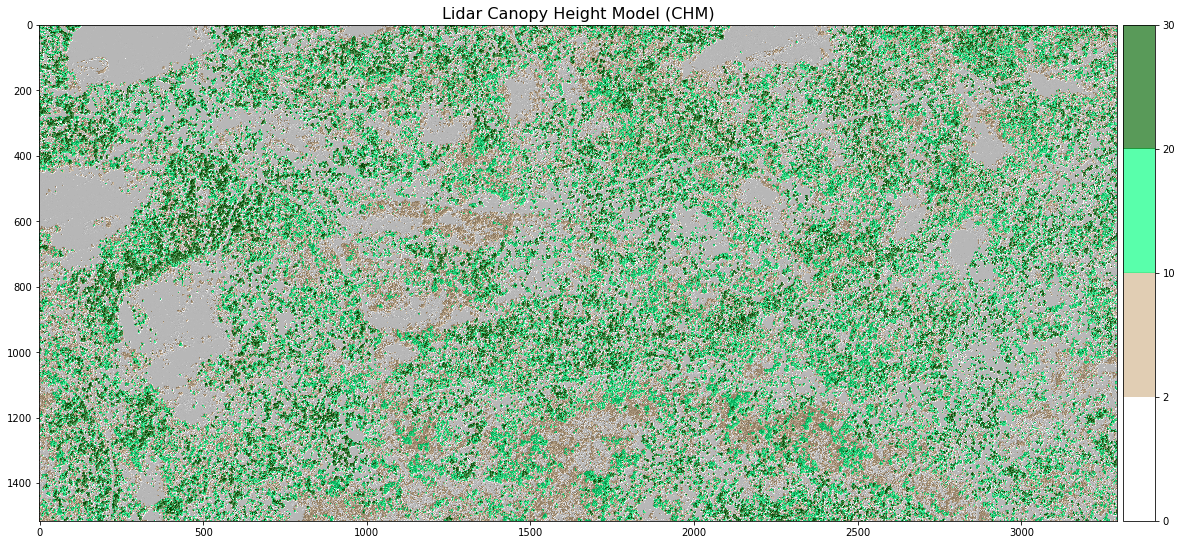

In [12]:
# create hillshade using hillshade function in earthpy
chm_hill = es.hillshade(lidar_chm, 315, 45)

# plot the data
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(chm_hill, cmap='Greys')
chm_plot = ax.imshow(lidar_chm, 
                     cmap=cmap, 
                     norm=norm, alpha = .65)

es.colorbar(chm_plot)
ax.set_title("Lidar Canopy Height Model (CHM)", fontsize=16);


## O Export a Raster in Python with Rasterio 

The last step is option. If you want to share your newly created CHM with a colleague, you may need to 
export it as a geotiff file. 

You can export a raster file in `python` using the `rasterio` `write()` function. Let's
export the canopy height model that you just created to your data folder. You will create a new directory called "outputs" within the week 3 directory. This structure allows you to keep things organized, separating your outputs from the data you downloaded.

NOTE: you can use the code below to check for and create an outputs directory. OR, you can create the directory yourself using the finder (MAC) or windows
explorer.

In [13]:
if os.path.exists('data/spatial-vector-lidar/spatial/outputs'):
    print('The directory exists!')
else:
    os.makedirs('data/spatial-vector-lidar/spatial/outputs')

The directory exists!


In [14]:
# export chm as a new geotiff to use or share with colleagues
with rio.open('data/spatial-vector-lidar/spatial/outputs/lidar_chm.tiff', 'w', **dsm_meta) as ff:
    ff.write(lidar_chm,1)

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> On Your Own Challenge 1

Practice your skills. Open the lidar_chm geotiff file that you just created. 
Do the following:

1. View the crs - is it correct?
2. View the x and y spatial resolution. 
3. Plot the data using a color bar of your choice. 

Your plot should look like the one below (athough the colors may be different.
</div>


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> On Your Own Challenge 2

Create a Canopy Height Model using the DTM and DSM from the SJER field site. Do you notice
differences between the two sites?

</div>

In [15]:
# if there's time add the code for this here. it will be hidden